In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Employee Attrition Prediction.xlsx')

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### There are no null value in the dataset

## For checking the summary of the numerical and categorical attributes of the data

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [7]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


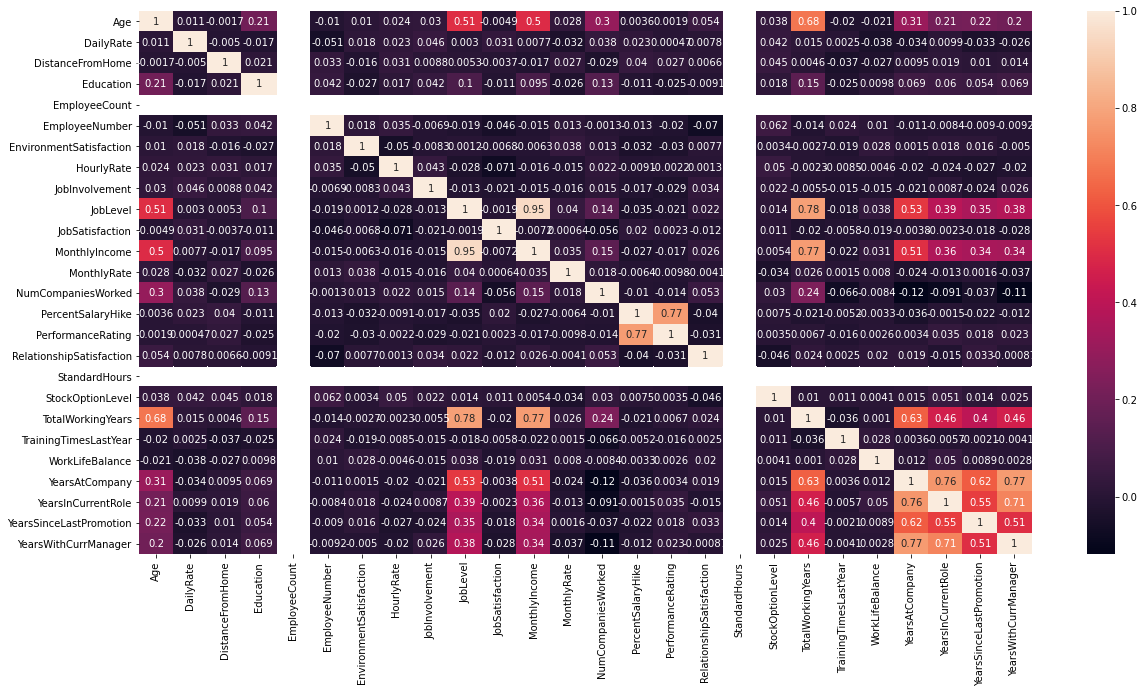

In [8]:
fig = plt.figure(figsize=(20,10))
fig = sns.heatmap(data.corr(), annot=True)

In [9]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [10]:
data['EmployeeCount'].unique()

array([1], dtype=int64)

In [11]:
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [12]:
data['StandardHours'].unique()

array([80], dtype=int64)

#### It seems that EmployeeCount attribute is not a very good predictor for predicting the Attrition. As this column has 1 for all the instances which has no correlation with the target also. Same happens with StandardHours atribute. So we can remove these two attributes

In [13]:
data_work = data.copy()
data_work = data_work.drop('StandardHours', axis=1)
data_work = data_work.drop('EmployeeCount', axis=1)

In [14]:
data_work.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [15]:
#fig = plt.figure(figsize=(20,20))
#fig = sns.heatmap(data_work.corr(), annot=True)

## Exploratory Data Analysis

In [16]:
data_work.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Among all the columns,  JobInvolvement, JobLevel, JobSatisfaction, EnvironmentSatisfaction, PerformanceRating, StockOptionLevel, RelationshipSatisfaction, WorkLifeBalance seem to be Categorical in nature though they have been given with numerical data type.EnvironmentSatisfaction, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorklifeBalance are the scores given out of a particular scale.  

In [17]:
data_work.select_dtypes(include=np.number)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,2062,4,42,2,3,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2064,2,87,4,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,2065,4,63,2,2,2,...,3,4,0,17,3,2,9,6,0,8


### Checking Distribution of Numerical columns

### Age attribute

<AxesSubplot:xlabel='Age', ylabel='Count'>

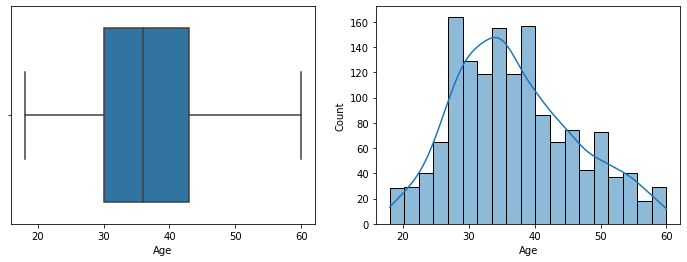

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='Age', data=data_work, ax=axes[0])
sns.histplot(x='Age', data=data_work, kde=True, ax=axes[1])

#### Normal Distribution can be found for Age attribute & no outliers present

## DailyRate attribute

<AxesSubplot:xlabel='DailyRate', ylabel='Count'>

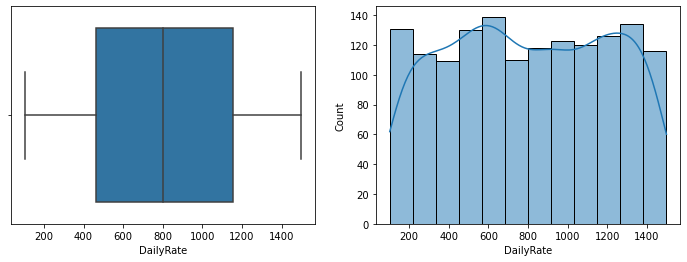

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='DailyRate', data=data_work, ax=axes[0])
sns.histplot(x='DailyRate', data=data_work, kde=True, ax=axes[1])

#### seems to be uniformly distributed & no outliers present

## DistanceFromHome attribute

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

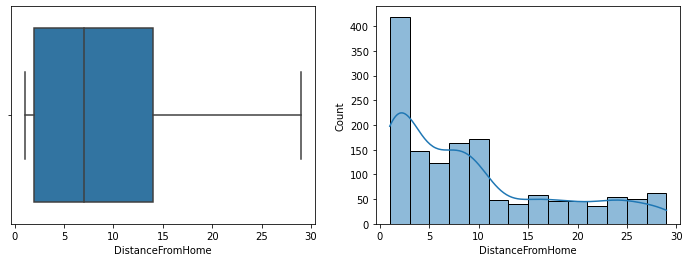

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='DistanceFromHome', data=data_work, ax=axes[0])
sns.histplot(x='DistanceFromHome', data=data_work, kde=True, ax=axes[1])

#### Slightly Right skewed & no outliers present

## HourlyRate attribute

<AxesSubplot:xlabel='HourlyRate', ylabel='Count'>

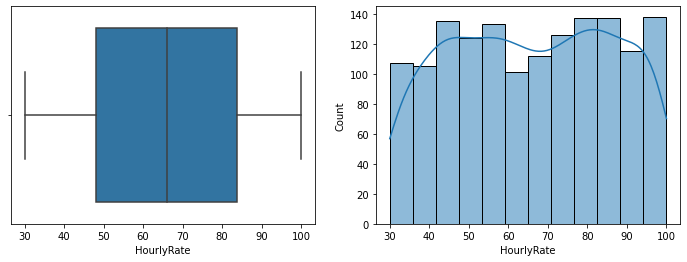

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='HourlyRate', data=data_work, ax=axes[0])
sns.histplot(x='HourlyRate', data=data_work, kde=True, ax=axes[1])

#### Almost uniformly distributed and no outliers

## MonthlyIncome attribute

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

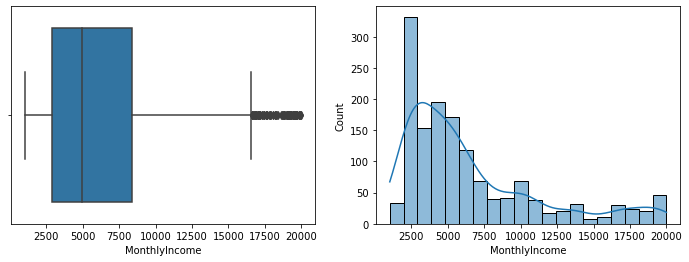

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='MonthlyIncome', data=data_work, ax=axes[0])
sns.histplot(x='MonthlyIncome', data=data_work, kde=True, ax=axes[1])

#### Right skewed and have outliers

## MonthlyRate attribute

<AxesSubplot:xlabel='MonthlyRate', ylabel='Count'>

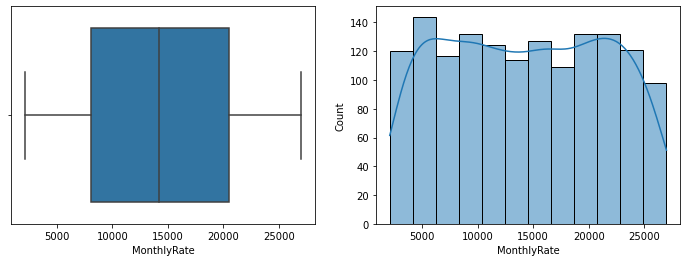

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='MonthlyRate', data=data_work, ax=axes[0])
sns.histplot(x='MonthlyRate', data=data_work, kde=True, ax=axes[1])

#### Uniformly distributed and no outliers

## NumCompaniesWorked attribute

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Count'>

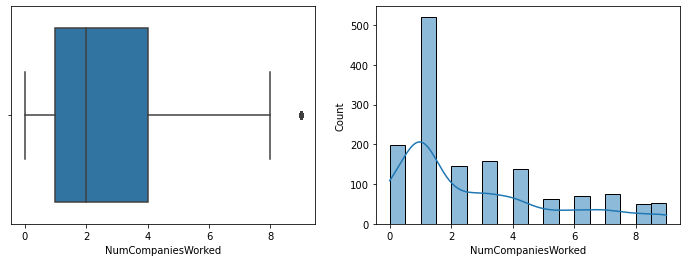

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='NumCompaniesWorked', data=data_work, ax=axes[0])
sns.histplot(x='NumCompaniesWorked', data=data_work, kde=True, ax=axes[1])

#### Right skewed and Only one outlier present

## PercentSalaryHike attribute

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Count'>

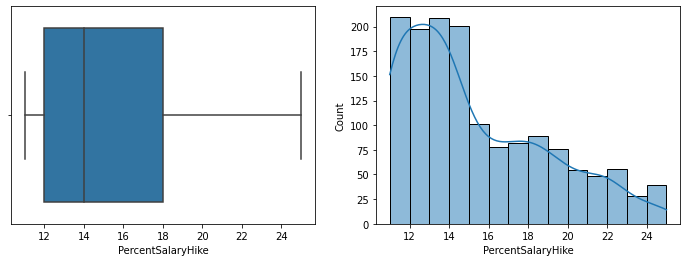

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='PercentSalaryHike', data=data_work, ax=axes[0])
sns.histplot(x='PercentSalaryHike', data=data_work, kde=True, ax=axes[1])

## TotalWorkingYears attribute

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Count'>

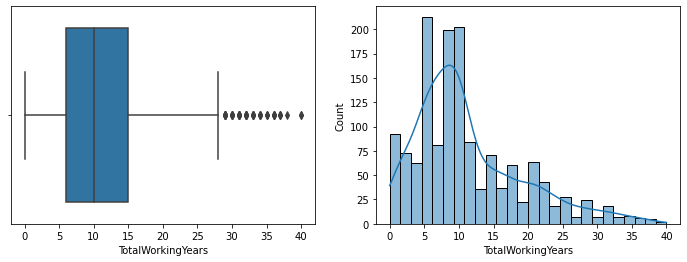

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='TotalWorkingYears', data=data_work, ax=axes[0])
sns.histplot(x='TotalWorkingYears', data=data_work,kde=True, ax=axes[1])

#### attribute is Right skewed and have outliers

## YearsAtCompany attribute

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

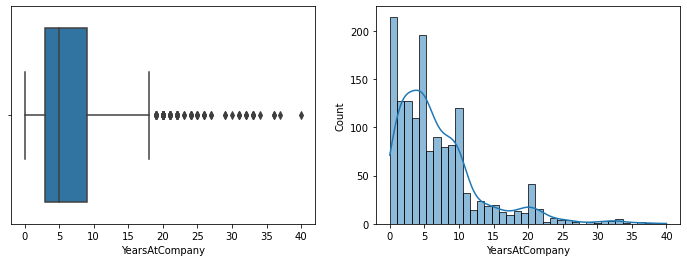

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='YearsAtCompany', data=data_work, ax=axes[0])
sns.histplot(x='YearsAtCompany', data=data_work,kde=True, ax=axes[1])

#### attribute is right skewed and have outliers 

## YearsInCurrentRole attribute

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Count'>

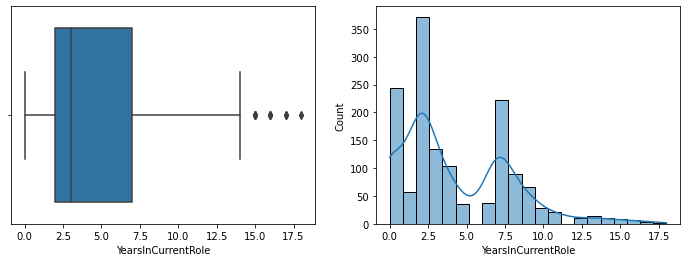

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='YearsInCurrentRole', data=data_work, ax=axes[0])
sns.histplot(x='YearsInCurrentRole', data=data_work,kde=True, ax=axes[1])

#### attribute is right skewed and have a few outliers

## YearsSinceLastPromotion attribute

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Count'>

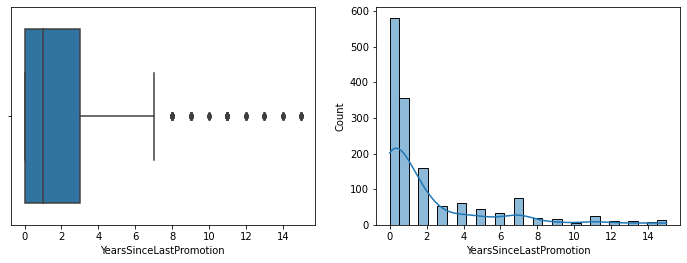

In [29]:
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='YearsSinceLastPromotion', data=data_work, ax=axes[0])
sns.histplot(x='YearsSinceLastPromotion', data=data_work, kde=True, ax=axes[1])

#### attribute is highly right skewed and have outliers

## YearsWithCurrManager attribute

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Count'>

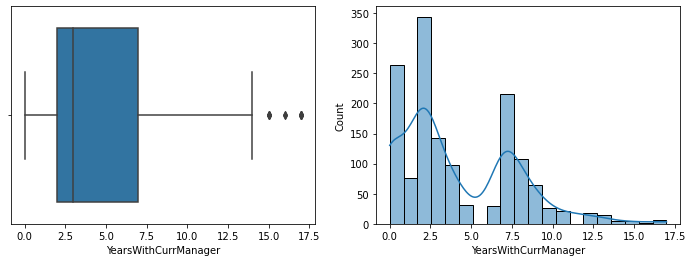

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='YearsWithCurrManager', data=data_work, ax=axes[0])
sns.histplot(x='YearsWithCurrManager', data=data_work, kde=True, ax=axes[1])

#### Right skewed and have very few outliers

## Education attribute

In [31]:
data_work['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='Count'>

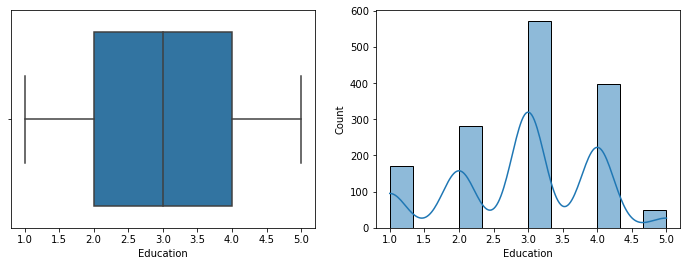

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='Education', data=data_work, ax=axes[0])
sns.histplot(x='Education', data=data_work, kde=True, ax=axes[1])

### Education attribute is not that much meaningful to be a predictor of attrition rather we can consider the attribute 'EducationField' . So we will drop the column 'Education' attribute

In [33]:
data_work = data_work.drop('Education', axis=1)

## Checking Unique values of a column

### EducationField attribute

In [34]:
data_work['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

### EmployeeNumber attribute

In [35]:
data_work['EmployeeNumber'].nunique()

1470

#### EmployeeNumber seems to have unique identification number for each Employee which doesn't seem to be a good predictor for attrition. Hence we can drop this attribute

In [36]:
data_work = data_work.drop('EmployeeNumber', axis=1)

## EnvironmentSatisfaction attribute

In [37]:
data_work['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

## NumCompaniesWorked attribute

In [38]:
data_work['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [39]:
#data_work.groupby(by='NumCompaniesWorked')['Attrition'].count()

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

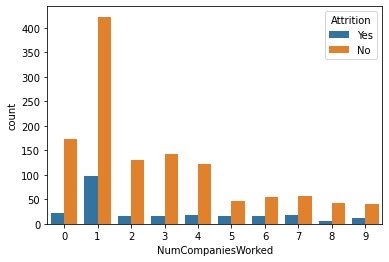

In [40]:
sns.countplot(x=data_work['NumCompaniesWorked'], hue=data_work['Attrition'],data= data_work)

### The people who have worked in only 1 company have highest chance to leave the organization. 

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

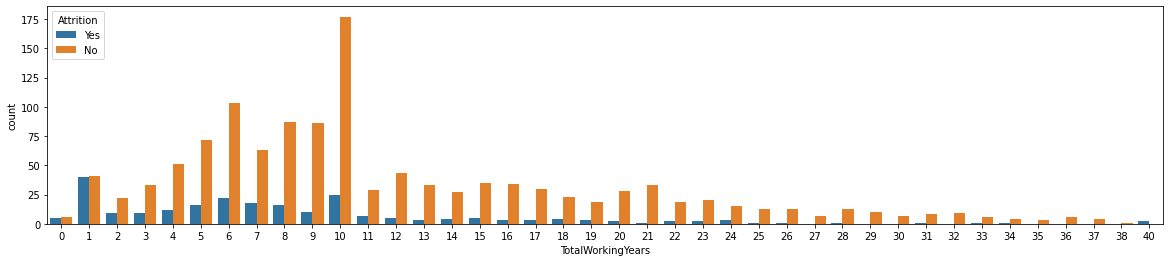

In [41]:
fig = plt.figure(figsize=(20,4))
sns.countplot(x=data_work['TotalWorkingYears'], hue=data_work['Attrition'],data= data_work)

### It shows that persons with high 'Working Years' don't tend to leave the organization whereas persons having having only 1 working year tend to leave the organization most.

<AxesSubplot:xlabel='Over18', ylabel='count'>

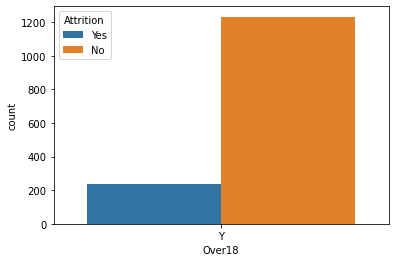

In [42]:
sns.countplot(x=data_work['Over18'], hue=data_work['Attrition'], data=data_work)

In [43]:
data_work.groupby(by='Attrition')['Over18'].count()

Attrition
No     1233
Yes     237
Name: Over18, dtype: int64

### It shows that all the employees are above 18 years old and among them 237 people tend to leave the organization

In [44]:
data_work['TrainingTimesLastYear'].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

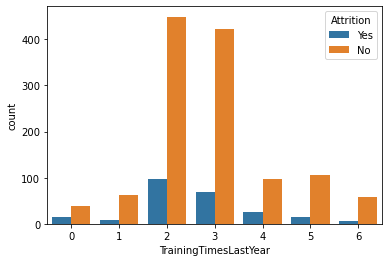

In [45]:
sns.countplot(x=data_work['TrainingTimesLastYear'], hue='Attrition', data=data_work)

### The people who did training twice and thrice in the last year have higher count than other categories and thee two have hogher count of people leaving the organization

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

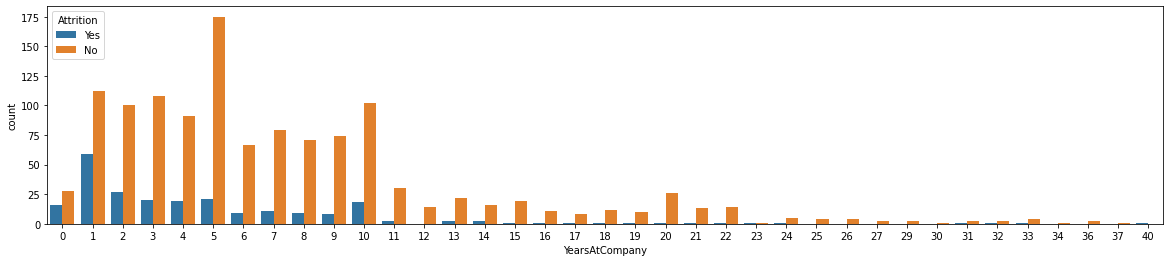

In [46]:
fig = plt.figure(figsize=(20,4))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=data_work)

### As the number of years in a company for an employee is increasing the attrition count is decreasing . The people having less number of years in the organization have higher count of attrition. The people having 1 year at company have highest count of attrition

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

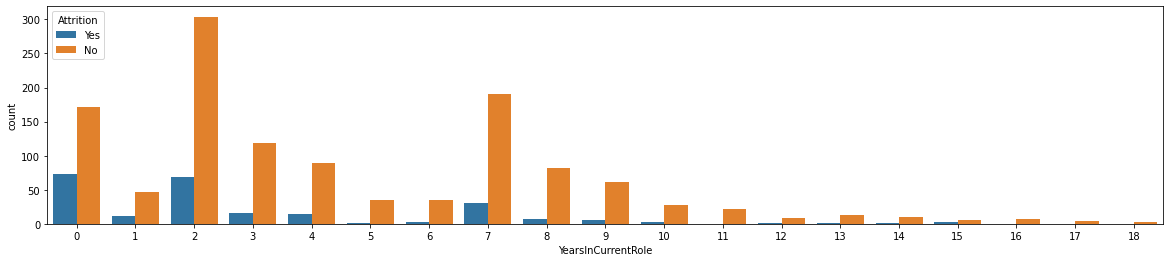

In [47]:
fig = plt.figure(figsize=(20,4))
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=data_work)

In [48]:
#data_work.groupby(['YearsInCurrentRole','Attrition']).count()

### The people with 0 years in current role i.e. not worked at all and 2 years in current role tend to leave the organization most

In [49]:
data_work['DistanceFromHome'].min(), data_work['DistanceFromHome'].max()

(1, 29)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

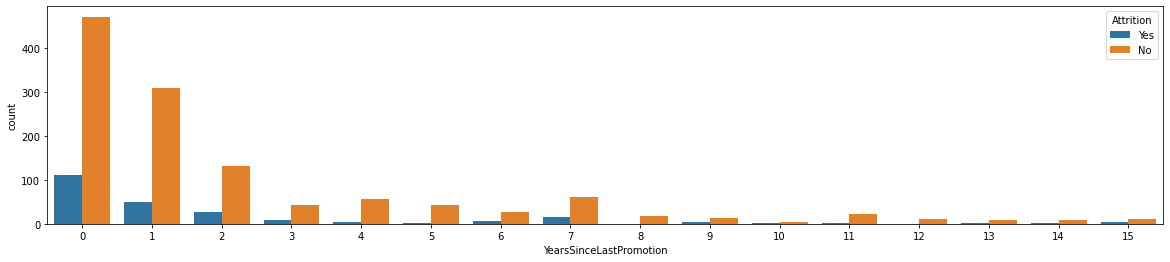

In [50]:
fig = plt.figure(figsize=(20,4))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=data_work)

### The people with 0 years since their last promotion have high chance to leave the organization i.e, the people who have been promoted recently tend to leave the organization most

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

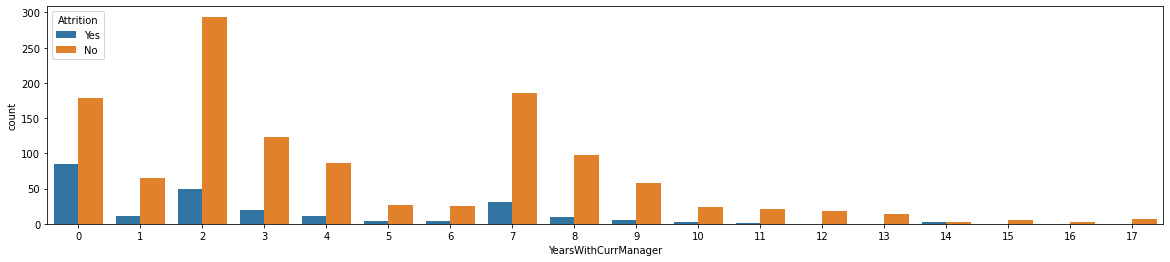

In [51]:
fig = plt.figure(figsize=(20,4))
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=data_work)

### As the people are getting more familier with their current manager their tendency to leave the organization is reducing. Whereas the people spending least time with their current manager have high chance to leave the organization

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

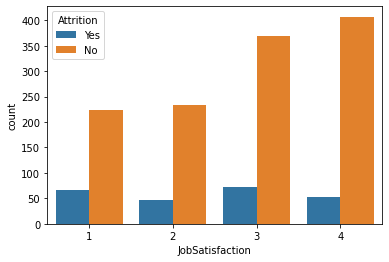

In [52]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data_work)

### The people who have given rating 3 as the JobSatisfaction Score have the highest tendency to leave the organization

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

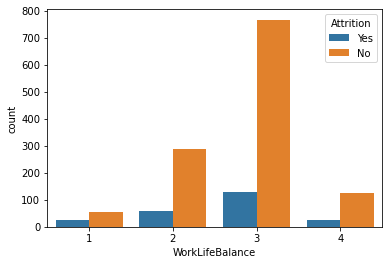

In [53]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=data_work)

### The people who have scored worklifebalance as 3 have highest chance to leave the organization

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

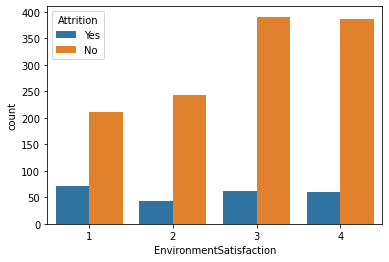

In [54]:
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=data_work)

### The employee whi have scored 1 for EnvironmentSatisfaction have highest chance to leave the organization followed by the employee with score 3, 4 2 respectively

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

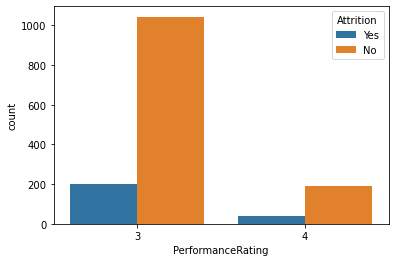

In [55]:
sns.countplot(x='PerformanceRating', hue='Attrition', data=data_work)

### The people who have got 3rd rating for their performance have highest chance to leave the organization

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

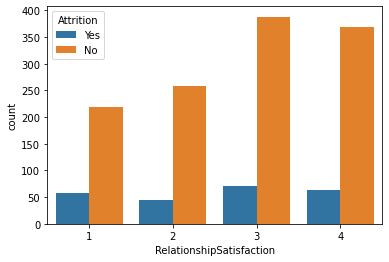

In [56]:
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=data_work)

### The score holder 3 for Relationship Satisfaction have highest chance to leave organization

<AxesSubplot:xlabel='JobRole', ylabel='count'>

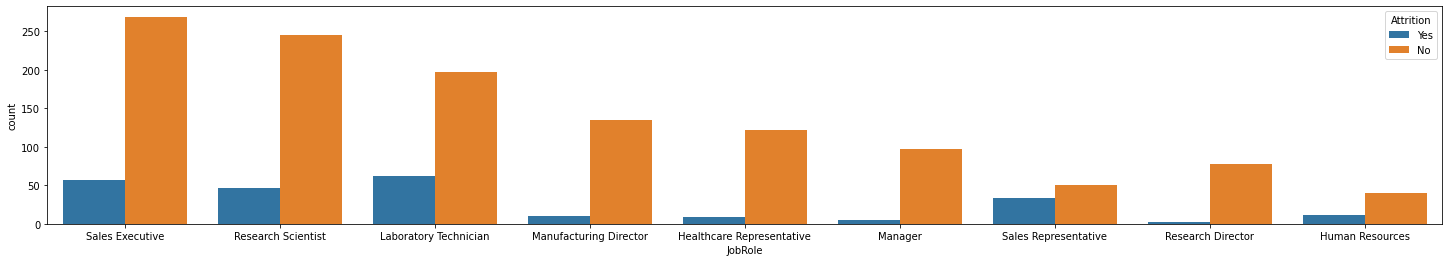

In [57]:
fig = plt.figure(figsize=(25,4))
sns.countplot(x='JobRole', hue='Attrition', data=data_work)

### The Employee belonging to Laboratory Technician role have highest chance to leave the organization

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

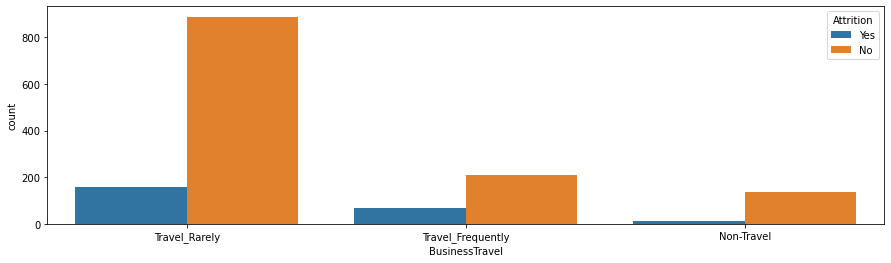

In [58]:
fig = plt.figure(figsize=(15,4))
sns.countplot(x='BusinessTravel', hue='Attrition', data=data_work)

### The employee who travel rarely have highest chance to leave the organization

<AxesSubplot:xlabel='Department', ylabel='count'>

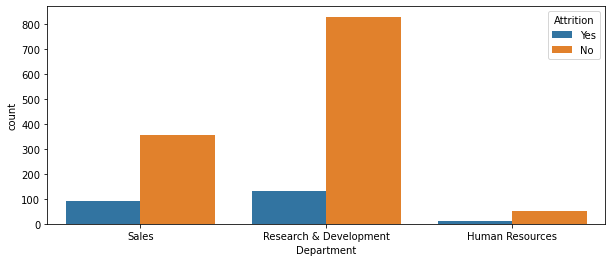

In [59]:
fig = plt.figure(figsize=(10,4))
sns.countplot(x='Department', hue='Attrition', data=data_work)

### The employee belonging to Research and Development department tend to leave the organization most

<AxesSubplot:xlabel='EducationField', ylabel='count'>

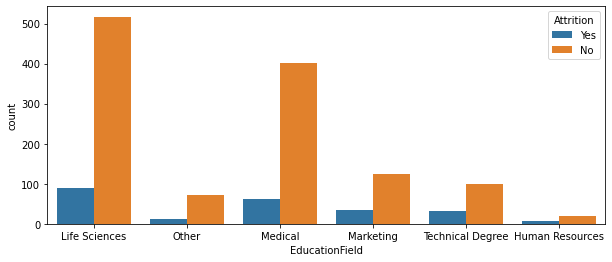

In [60]:
fig = plt.figure(figsize=(10,4))
sns.countplot(x='EducationField', hue='Attrition', data=data_work)

### The Employee belonging to Life Sciences Education Field have the highest chance to leave the organization

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

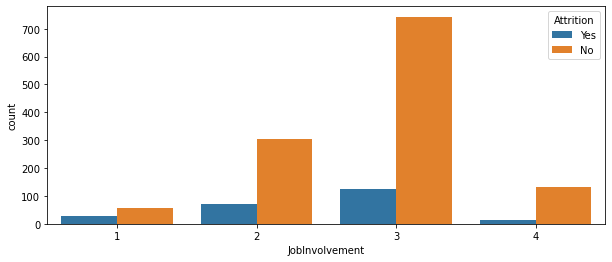

In [61]:
fig = plt.figure(figsize=(10,4))
sns.countplot(x='JobInvolvement', hue='Attrition', data=data_work)

### The employee whi have given score 3 for Jobinvolvement are more likely to leave the organization followed by the employee having score 2

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

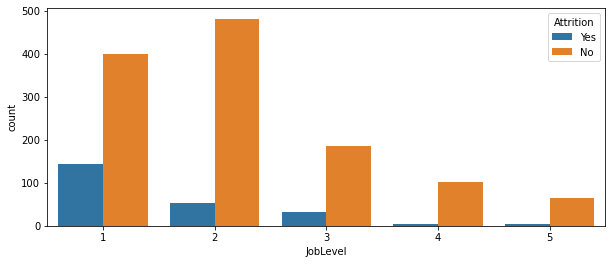

In [62]:
fig = plt.figure(figsize=(10,4))
sns.countplot(x='JobLevel', hue='Attrition', data=data_work)

### The employee working in Job level 1 are most likely to leave the organization followed by level 2 and level 3

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

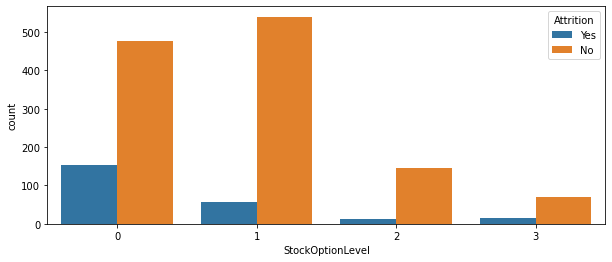

In [63]:
fig = plt.figure(figsize=(10,4))
sns.countplot(x='StockOptionLevel', hue='Attrition', data=data_work)

### The Employee having StockOptionlevel 0 are most likely to leave the organization followed by the employee having score 1 and so on are most likely to leave the organization

## Demographic Profile wise Exploration of Data

### Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

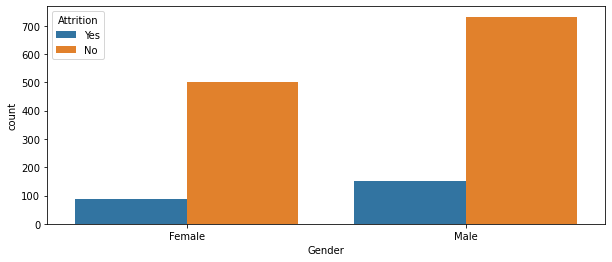

In [64]:
fig = plt.figure(figsize=(10,4))
sns.countplot(x='Gender', hue='Attrition', data=data_work)

### We can see that Male employee have high chances to leave the organization

### Marital Status

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

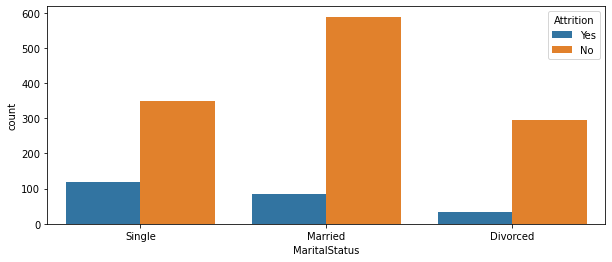

In [65]:
fig = plt.figure(figsize=(10,4))
sns.countplot(x='MaritalStatus', hue='Attrition', data=data_work)

### The employees who are Single have high chances to leave the organization

## Age attribute

In [66]:
data_work['Age'].nunique()

43

In [67]:
data_work['Age'].value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [68]:
data_work['Age'].min(), data_work['Age'].max()

(18, 60)

In [69]:
#data_work['age_group'] = np.ceil(data_work['Age']/data_work['Age'].min())

In [70]:
#data_work[['Age','age_group']]

In [71]:
#data_work = data_work.drop('age_group', axis=1)

In [72]:
#len(data_work['age_group'].value_counts().sort_index(ascending= True))

In [73]:
#data_work['age_group'].value_counts().sort_index(ascending = True)

### Grouping Age attribute

In [74]:
def Age_Group(x):
    if (x>= 18 and x<=27):
        return 'Youngest'
    elif (x>27 and x<=36):
        return 'Lower Middle'
    elif (x>36 and x<=45):
        return 'Upper Middle'
    else:
        return 'Oldest'

In [75]:
data_work['Age_Group'] = data_work['Age'].apply(Age_Group)

In [76]:
data_work[['Age', 'Age_Group']]

,Age,Age_Group
0,41,Upper Middle
1,49,Oldest
2,37,Upper Middle
3,33,Lower Middle
4,27,Youngest
...,...,...
1465,36,Lower Middle
1466,39,Upper Middle
1467,27,Youngest
1468,49,Oldest


In [77]:
data_work['Age_Group'].value_counts().sort_index(ascending=True)

Lower Middle    588
Oldest          273
Upper Middle    399
Youngest        210
Name: Age_Group, dtype: int64

In [78]:
data_work.groupby(by='Attrition')['Age_Group'].count()

Attrition
No     1233
Yes     237
Name: Age_Group, dtype: int64

<AxesSubplot:xlabel='Age_Group', ylabel='count'>

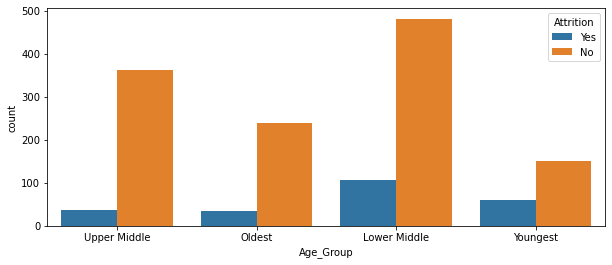

In [79]:
fig = plt.figure(figsize=(10,4))
sns.countplot(x='Age_Group', hue='Attrition', data=data_work)

In [80]:
data_work.groupby(by='Age_Group')['MonthlyIncome'].mean()

Age_Group
Lower Middle     5125.270408
Oldest          10630.073260
Upper Middle     7366.182957
Youngest         3354.919048
Name: MonthlyIncome, dtype: float64

In [81]:
data_work['MonthlyIncome'].mean()

6502.931292517007

### As we can see that 'Youngest' and 'Lower Middle' age group tend to leave the company most as their average monthly income is lower than overall average income. So they have the highest tendency to leave the organization

In [82]:
data_work.groupby(by='Age_Group')['JobSatisfaction'].mean()

Age_Group
Lower Middle    2.743197
Oldest          2.699634
Upper Middle    2.736842
Youngest        2.709524
Name: JobSatisfaction, dtype: float64

In [83]:
data_work['JobSatisfaction'].mean()

2.7285714285714286

### According to average Job satisfaction it can be found that oldest group having highest job dissatifaction as the deviation of thier average job satisfaction is highest from overall average job satisfaction. After the 'Oldest' group 'Youngest' group comes followd by 'Upper Middle' and 'Lower Middle' Age group.So if Job satisfaction taken into count then it might be the case that the Oldest age group people would have to leave the organization most

### Converting Target(Attrition) feature from 'Yes', 'No' to 1 and 0

In [84]:
data_work['Attrition'] = data_work['Attrition'].replace({'Yes':1,'No':0})

In [85]:
data_work.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Group
0,41,1,Travel_Rarely,1102,Sales,1,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Upper Middle
1,49,0,Travel_Frequently,279,Research & Development,8,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,Oldest
2,37,1,Travel_Rarely,1373,Research & Development,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Upper Middle
3,33,0,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,Lower Middle
4,27,0,Travel_Rarely,591,Research & Development,2,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,Youngest


In [86]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


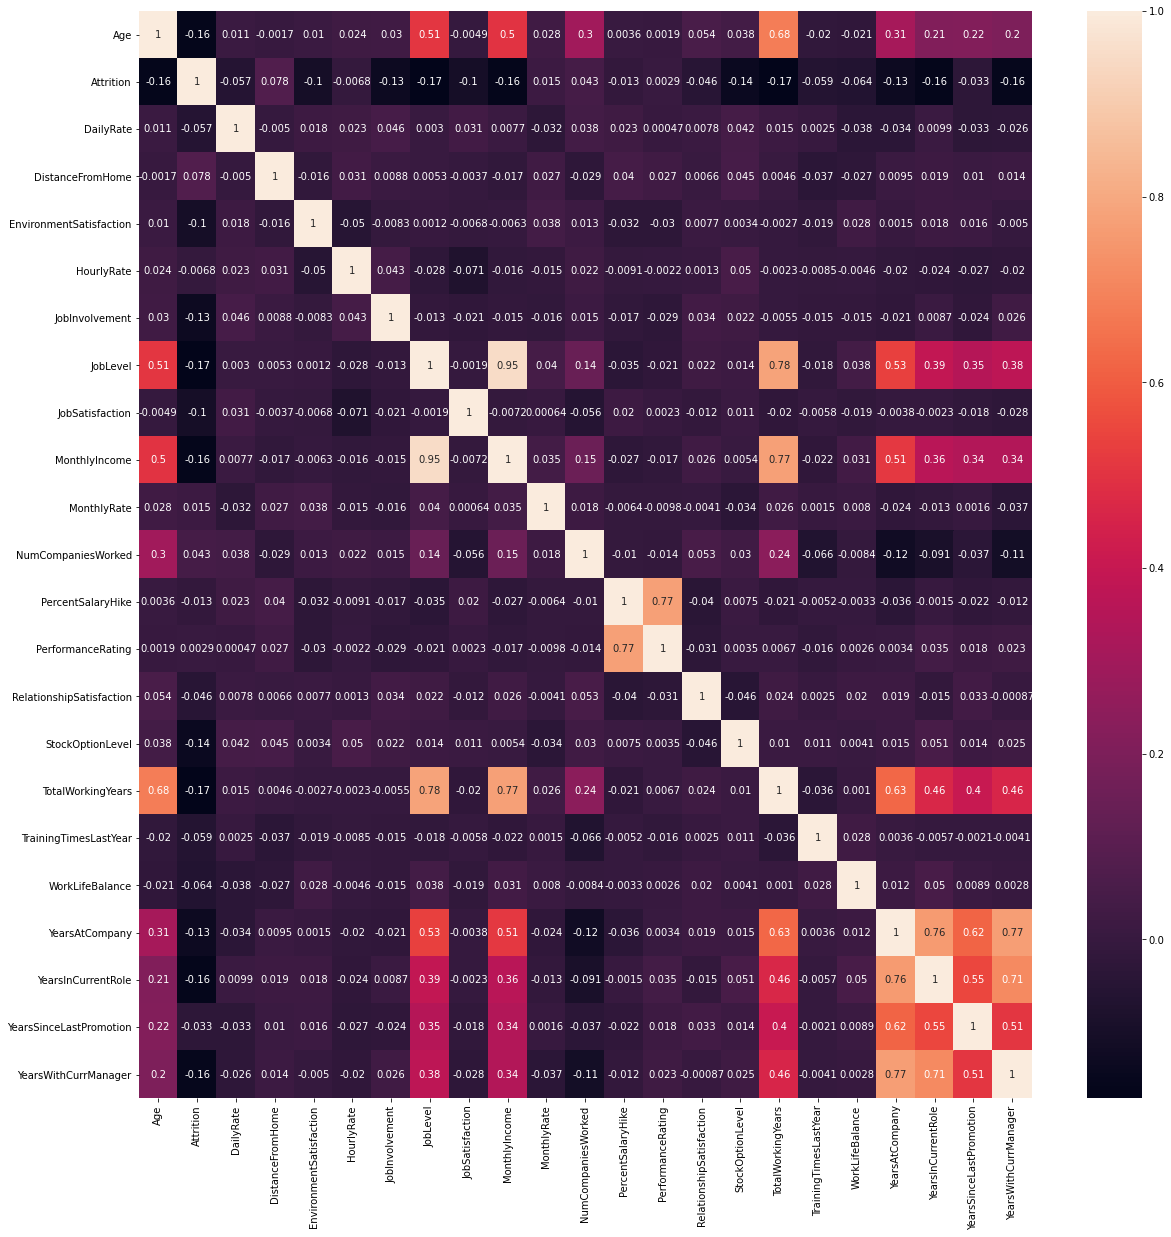

In [87]:
fig = plt.figure(figsize=(20,20))
fig = sns.heatmap(data_work.corr(), annot=True)

In [88]:
corr = data_work.corr()

In [89]:
corr['Attrition'].sort_values(ascending=True)

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
PerformanceRating           0.002889
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
DistanceFromHome            0.077924
Attrition                   1.000000
Name: Attrition, dtype: float64

## User Defined Function for Outlier detection

In [90]:
outliers = []
upper_lim = 0
lower_lim = 0
def outlier_detection(x):
    global outliers
    x_dict = dict(data_work[x].describe())
    print(x_dict)
    Q1 = x_dict['25%']
    print("Q1 :", Q1)
    Q3 = x_dict['75%']
    print("Q3 :", Q3)
    IQR = Q3 - Q1
    print("Inter quartile range is ", IQR)
    global lower_lim
    global upper_lim
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    print("The lower limit is ", round(lower_lim))
    print("The upper limit is ", round(upper_lim))

    for i in data_work[x]:
        if ((i > upper_lim) | (i < lower_lim)):
            outliers.append(i)
#    print("The outliers of ", x ,"is :", outliers)
    print("The number of outliers are: ",len(outliers))

In [91]:
outlier_detection('MonthlyIncome')

{'count': 1470.0, 'mean': 6502.931292517007, 'std': 4707.956783097995, 'min': 1009.0, '25%': 2911.0, '50%': 4919.0, '75%': 8379.0, 'max': 19999.0}
Q1 : 2911.0
Q3 : 8379.0
Inter quartile range is  5468.0
The lower limit is  -5291
The upper limit is  16581
The number of outliers are:  114


In [92]:
print("The percentage of outliers for 'MonthlyIncome' is: ",100*len(outliers)/len(data_work))

The percentage of outliers for 'MonthlyIncome' is:  7.755102040816326


In [93]:
outlier_detection('NumCompaniesWorked')

{'count': 1470.0, 'mean': 2.6931972789115646, 'std': 2.498009006070751, 'min': 0.0, '25%': 1.0, '50%': 2.0, '75%': 4.0, 'max': 9.0}
Q1 : 1.0
Q3 : 4.0
Inter quartile range is  3.0
The lower limit is  -4
The upper limit is  8
The number of outliers are:  166


In [94]:
print("The percentage of outliers for 'NumCompaniesWorked' is: ",100*len(outliers)/len(data_work))

The percentage of outliers for 'NumCompaniesWorked' is:  11.29251700680272


In [95]:
outlier_detection('TotalWorkingYears')

{'count': 1470.0, 'mean': 11.279591836734694, 'std': 7.780781675515004, 'min': 0.0, '25%': 6.0, '50%': 10.0, '75%': 15.0, 'max': 40.0}
Q1 : 6.0
Q3 : 15.0
Inter quartile range is  9.0
The lower limit is  -8
The upper limit is  28
The number of outliers are:  229


In [96]:
print("The percentage of outliers for 'TotalWorkingYears' is: ",100*len(outliers)/len(data_work))

The percentage of outliers for 'TotalWorkingYears' is:  15.578231292517007


In [97]:
outlier_detection('YearsAtCompany')

{'count': 1470.0, 'mean': 7.0081632653061225, 'std': 6.126525152403566, 'min': 0.0, '25%': 3.0, '50%': 5.0, '75%': 9.0, 'max': 40.0}
Q1 : 3.0
Q3 : 9.0
Inter quartile range is  6.0
The lower limit is  -6
The upper limit is  18
The number of outliers are:  333


In [98]:
print("The percentage of outliers for 'YearsAtCompany' is: ",100*len(outliers)/len(data_work))

The percentage of outliers for 'YearsAtCompany' is:  22.653061224489797


In [99]:
outlier_detection('YearsInCurrentRole')

{'count': 1470.0, 'mean': 4.229251700680272, 'std': 3.6231370346706395, 'min': 0.0, '25%': 2.0, '50%': 3.0, '75%': 7.0, 'max': 18.0}
Q1 : 2.0
Q3 : 7.0
Inter quartile range is  5.0
The lower limit is  -6
The upper limit is  14
The number of outliers are:  354


In [100]:
print("The percentage of outliers for 'YearsInCurrentRole' is: ",100*len(outliers)/len(data_work))

The percentage of outliers for 'YearsInCurrentRole' is:  24.081632653061224


In [101]:
outlier_detection('YearsSinceLastPromotion')

{'count': 1470.0, 'mean': 2.1877551020408164, 'std': 3.222430279137968, 'min': 0.0, '25%': 0.0, '50%': 1.0, '75%': 3.0, 'max': 15.0}
Q1 : 0.0
Q3 : 3.0
Inter quartile range is  3.0
The lower limit is  -4
The upper limit is  8
The number of outliers are:  461


In [102]:
print("The percentage of outliers for 'YearsSinceLastPromotion' is: ",100*len(outliers)/len(data_work))

The percentage of outliers for 'YearsSinceLastPromotion' is:  31.360544217687075


In [103]:
outlier_detection('YearsWithCurrManager')

{'count': 1470.0, 'mean': 4.12312925170068, 'std': 3.5681361205404407, 'min': 0.0, '25%': 2.0, '50%': 3.0, '75%': 7.0, 'max': 17.0}
Q1 : 2.0
Q3 : 7.0
Inter quartile range is  5.0
The lower limit is  -6
The upper limit is  14
The number of outliers are:  475


In [104]:
print("The percentage of outliers for 'YearsWithCurrManager' is: ",100*len(outliers)/len(data_work))

The percentage of outliers for 'YearsWithCurrManager' is:  32.31292517006803


### We can see the maximum percentage of outlier in the dataset is 32.31% which is found for 'YearsWithCurrentManager' attribute. We can impute these outliers but imputing them can bring impurity in the dataset. So, instead of imputing I am keeping the outliers. All the attributes having outliers are actually treated as important metric scores in real world scenario for attrition prediction. So we are keeping all the outliers as it is instead of imputation.

In [105]:
data_work.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Group
0,41,1,Travel_Rarely,1102,Sales,1,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Upper Middle
1,49,0,Travel_Frequently,279,Research & Development,8,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,Oldest
2,37,1,Travel_Rarely,1373,Research & Development,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Upper Middle
3,33,0,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,Lower Middle
4,27,0,Travel_Rarely,591,Research & Development,2,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,Youngest
5,32,0,Travel_Frequently,1005,Research & Development,2,Life Sciences,4,Male,79,...,3,0,8,2,2,7,7,3,6,Lower Middle
6,59,0,Travel_Rarely,1324,Research & Development,3,Medical,3,Female,81,...,1,3,12,3,2,1,0,0,0,Oldest
7,30,0,Travel_Rarely,1358,Research & Development,24,Life Sciences,4,Male,67,...,2,1,1,2,3,1,0,0,0,Lower Middle
8,38,0,Travel_Frequently,216,Research & Development,23,Life Sciences,4,Male,44,...,2,0,10,2,3,9,7,1,8,Upper Middle
9,36,0,Travel_Rarely,1299,Research & Development,27,Medical,3,Male,94,...,2,2,17,3,2,7,7,7,7,Lower Middle


In [106]:
data_work.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'EducationField', 'EnvironmentSatisfaction',
       'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_Group'],
      dtype='object')

### we can see that 'Over18' has only one type of data . and this attribute is not very important. So we can drop this column. 'Age_Group' attribute has been created for EDA purpose. So we can remove this also

In [107]:
data_work = data_work.drop('Over18', axis=1)
data_work = data_work.drop('Age_Group', axis = 1)

In [108]:
data_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

<AxesSubplot:xlabel='Attrition', ylabel='count'>

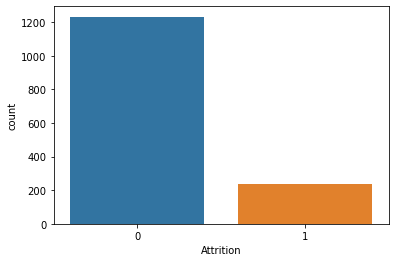

In [109]:
sns.countplot(x=data_work['Attrition'])

In [110]:
data_work['Attrition'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

## Separating the Target and Predictors

In [111]:
X = data_work.drop('Attrition', axis=1)
y = data_work['Attrition']

In [112]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,Life Sciences,2,Female,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,Life Sciences,3,Male,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,Other,4,Male,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,Female,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,Medical,1,Male,40,3,...,3,4,1,6,3,3,2,2,2,2


In [113]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

### Train-Test Split

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )

In [116]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
714,50,Travel_Rarely,1126,Research & Development,1,Medical,4,Male,66,3,...,4,3,1,32,1,2,5,4,1,3
135,36,Travel_Rarely,216,Research & Development,6,Medical,2,Male,84,3,...,4,4,2,7,0,3,3,2,0,1
1271,21,Travel_Rarely,337,Sales,7,Marketing,2,Male,31,3,...,3,2,0,1,3,3,1,0,1,0
477,50,Travel_Frequently,1246,Human Resources,3,Medical,1,Male,99,3,...,3,3,1,32,2,3,32,5,10,7
806,52,Travel_Rarely,994,Research & Development,7,Life Sciences,2,Male,87,3,...,3,4,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,Travel_Rarely,750,Research & Development,28,Life Sciences,2,Male,46,4,...,3,4,2,10,3,2,10,9,6,8
1294,41,Travel_Rarely,447,Research & Development,5,Life Sciences,2,Male,85,4,...,3,1,0,11,3,1,3,2,1,2
860,22,Travel_Frequently,1256,Research & Development,3,Life Sciences,3,Male,48,2,...,3,2,1,1,5,3,0,0,0,0
1459,29,Travel_Rarely,1378,Research & Development,13,Other,4,Male,46,2,...,3,1,1,10,2,3,4,3,0,3


In [117]:
y_train

714     0
135     0
1271    1
477     0
806     0
       ..
1130    0
1294    0
860     1
1459    0
1126    0
Name: Attrition, Length: 1029, dtype: int64

In [118]:
X_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1041,28,Travel_Rarely,866,Sales,5,Medical,4,Male,84,3,...,3,4,0,6,4,3,5,4,1,3
184,53,Travel_Rarely,1084,Research & Development,13,Medical,4,Female,57,4,...,3,3,2,5,3,3,4,2,1,3
1222,24,Travel_Rarely,240,Human Resources,22,Human Resources,4,Male,58,1,...,3,3,1,1,2,3,1,0,0,0
67,45,Travel_Rarely,1339,Research & Development,7,Life Sciences,2,Male,59,3,...,3,3,1,25,2,3,1,0,0,0
220,36,Travel_Rarely,1396,Research & Development,5,Life Sciences,4,Male,62,3,...,3,4,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,33,Travel_Frequently,430,Sales,7,Medical,4,Male,54,3,...,3,1,2,5,2,3,4,3,0,3
331,27,Non-Travel,210,Sales,1,Marketing,3,Male,73,3,...,3,4,1,6,0,3,5,4,1,4
323,28,Travel_Rarely,1157,Research & Development,2,Medical,1,Male,84,1,...,3,4,0,5,4,2,3,2,2,2
654,39,Travel_Rarely,1383,Human Resources,2,Life Sciences,4,Female,42,2,...,3,3,2,13,2,3,5,4,0,4


In [119]:
y_test

1041    0
184     0
1222    1
67      0
220     0
       ..
1047    0
331     0
323     1
654     0
1110    1
Name: Attrition, Length: 441, dtype: int64

In [120]:
y_train.value_counts(normalize=True)

0    0.82896
1    0.17104
Name: Attrition, dtype: float64

In [121]:
y_test.value_counts(normalize=True)

0    0.861678
1    0.138322
Name: Attrition, dtype: float64

## Preprocessing on the Train and Test set

### Separating Numerical and categorical Data

In [122]:
X_train_num = X_train.select_dtypes(exclude = 'object')
X_train_cat = X_train.select_dtypes(include = 'object')

In [123]:
X_train_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [124]:
X_train_num.head(8)

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
714,50,1126,1,4,66,3,4,4,17399,6615,...,4,3,1,32,1,2,5,4,1,3
135,36,216,6,2,84,3,2,2,4941,2819,...,4,4,2,7,0,3,3,2,0,1
1271,21,337,7,2,31,3,1,2,2679,4567,...,3,2,0,1,3,3,1,0,1,0
477,50,1246,3,1,99,3,5,2,18200,7999,...,3,3,1,32,2,3,32,5,10,7
806,52,994,7,2,87,3,3,2,10445,15322,...,3,4,0,18,4,3,8,6,4,0
435,33,1277,15,2,56,3,3,3,13610,24619,...,3,4,0,15,2,4,7,6,7,7
1303,47,1001,4,3,92,2,3,2,10333,19271,...,3,3,1,28,4,3,22,11,14,10
630,22,1230,1,4,33,2,2,4,4775,19146,...,4,1,2,4,2,1,2,2,2,2


In [125]:
X_train_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [126]:
X_train_cat.head(8)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
714,Travel_Rarely,Research & Development,Medical,Male,Research Director,Divorced,No
135,Travel_Rarely,Research & Development,Medical,Male,Manufacturing Director,Divorced,No
1271,Travel_Rarely,Sales,Marketing,Male,Sales Representative,Single,No
477,Travel_Frequently,Human Resources,Medical,Male,Manager,Married,No
806,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Single,No
435,Travel_Rarely,Research & Development,Medical,Male,Manager,Married,Yes
1303,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Divorced,Yes
630,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,No


## Preprocessing on Numerical Data

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
scaler = StandardScaler()

In [129]:
X_train_num_scaled = scaler.fit_transform(X_train_num)

In [130]:
X_train_num_scaled.shape

(1029, 22)

In [131]:
type(X_train_num_scaled)

numpy.ndarray

In [132]:
X_train_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [133]:
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)

In [134]:
X_train_num_scaled_df.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.413691,0.794212,-1.017728,1.201147,-0.033242,0.403897,1.749208,1.174489,2.284799,-1.077670,...,2.296604,0.287781,0.203426,2.648882,-1.389417,-1.073695,-0.320287,-0.058998,-0.360310,-0.285677
1,-0.098346,-1.440722,-0.409362,-0.623178,0.846345,0.403897,-0.039103,-0.649736,-0.314845,-1.613426,...,2.296604,1.216076,1.347281,-0.534305,-2.168975,0.361152,-0.650028,-0.605921,-0.682149,-0.853720
2,-1.718387,-1.143549,-0.287688,-0.623178,-1.743551,0.403897,-0.933258,-0.649736,-0.786862,-1.366719,...,-0.435426,-0.640515,-0.940429,-1.298270,0.169700,0.361152,-0.979769,-1.152845,-0.360310,-1.137742
3,1.413691,1.088928,-0.774382,-1.535340,1.579335,0.403897,2.643363,-0.649736,2.451946,-0.882336,...,-0.435426,0.287781,0.203426,2.648882,-0.609859,0.361152,4.131212,0.214464,2.536244,0.850408
4,1.629697,0.470024,-0.287688,-0.623178,0.992943,0.403897,0.855052,-0.649736,0.833690,0.151210,...,-0.435426,1.216076,-0.940429,0.866297,0.949258,0.361152,0.174324,0.487926,0.605208,-1.137742


## Preprocessing on Categorical Data

In [135]:
X_train_dummy = pd.get_dummies(X_train_cat, drop_first=True)

In [136]:
X_train_dummy.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
714,0,1,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
135,0,1,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1271,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
477,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
806,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [137]:
X_train_dummy.index

Int64Index([ 714,  135, 1271,  477,  806,  435, 1303,  630,  598, 1198,
            ...
            1238,  466,  121, 1044, 1095, 1130, 1294,  860, 1459, 1126],
           dtype='int64', length=1029)

In [138]:
X_train_num_scaled_df.index

RangeIndex(start=0, stop=1029, step=1)

In [139]:
X_train_num_scaled_df.index = X_train_dummy.index

In [140]:
X_train_num_scaled_df.index

Int64Index([ 714,  135, 1271,  477,  806,  435, 1303,  630,  598, 1198,
            ...
            1238,  466,  121, 1044, 1095, 1130, 1294,  860, 1459, 1126],
           dtype='int64', length=1029)

### Concatenating the dataframes to create final train set

In [141]:
X_train_final = pd.concat([X_train_num_scaled_df, X_train_dummy], axis=1)

In [142]:
#pd.concat([X_test_num_scaled_df, X_test_dummy], axis=1)

In [143]:
X_train_final.head(8)

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
714,1.413691,0.794212,-1.017728,1.201147,-0.033242,0.403897,1.749208,1.174489,2.284799,-1.077670,...,0,0,0,1,0,0,0,0,0,0
135,-0.098346,-1.440722,-0.409362,-0.623178,0.846345,0.403897,-0.039103,-0.649736,-0.314845,-1.613426,...,0,0,1,0,0,0,0,0,0,0
1271,-1.718387,-1.143549,-0.287688,-0.623178,-1.743551,0.403897,-0.933258,-0.649736,-0.786862,-1.366719,...,0,0,0,0,0,0,1,0,1,0
477,1.413691,1.088928,-0.774382,-1.535340,1.579335,0.403897,2.643363,-0.649736,2.451946,-0.882336,...,0,1,0,0,0,0,0,1,0,0
806,1.629697,0.470024,-0.287688,-0.623178,0.992943,0.403897,0.855052,-0.649736,0.833690,0.151210,...,0,0,0,0,0,0,0,0,1,0
435,-0.422355,1.165063,0.685699,-0.623178,-0.521902,0.403897,0.855052,0.262377,1.494138,1.463361,...,0,1,0,0,0,0,0,1,0,1
1303,1.089683,0.487215,-0.652708,0.288984,1.237273,-1.004950,0.855052,-0.649736,0.810318,0.708560,...,0,0,1,0,0,0,0,0,0,1
630,-1.610384,1.049633,-1.017728,1.201147,-1.645819,-1.004950,-0.039103,1.174489,-0.349484,0.690918,...,0,0,1,0,0,0,0,1,0,0


In [144]:
X_train_final.shape

(1029, 43)

In [145]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 714 to 1126
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1029 non-null   float64
 1   DailyRate                          1029 non-null   float64
 2   DistanceFromHome                   1029 non-null   float64
 3   EnvironmentSatisfaction            1029 non-null   float64
 4   HourlyRate                         1029 non-null   float64
 5   JobInvolvement                     1029 non-null   float64
 6   JobLevel                           1029 non-null   float64
 7   JobSatisfaction                    1029 non-null   float64
 8   MonthlyIncome                      1029 non-null   float64
 9   MonthlyRate                        1029 non-null   float64
 10  NumCompaniesWorked                 1029 non-null   float64
 11  PercentSalaryHike                  1029 non-null   flo

## Preprocessing on Test Dataset

### Separating Numerical and Categorical Data

In [146]:
X_test_num = X_test.select_dtypes(exclude = 'object')
X_test_cat = X_test.select_dtypes(include = 'object')

### Preprocessing on Numerical Data

In [147]:
X_test_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [148]:
X_test_num_scaled = scaler.transform(X_test_num)

In [149]:
X_test_num_scaled.shape

(441, 22)

In [150]:
type(X_test_num_scaled)

numpy.ndarray

In [151]:
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns)

In [152]:
X_test_num_scaled_df.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.962368,0.155659,-0.531035,1.201147,0.846345,0.403897,-0.039103,-1.561849,0.420100,1.304017,...,-0.435426,1.216076,-0.940429,-0.661633,0.949258,0.361152,-0.320287,-0.058998,-0.360310,-0.285677
1,1.737699,0.691061,0.442352,1.201147,-0.473036,1.812743,-0.039103,-1.561849,-0.417303,1.693556,...,-0.435426,0.287781,1.347281,-0.788960,0.169700,0.361152,-0.485158,-0.605921,-0.360310,-0.285677
2,-1.394379,-1.381778,1.537412,1.201147,-0.424170,-2.413796,-0.933258,0.262377,-1.021410,-0.376219,...,-0.435426,0.287781,0.203426,-1.298270,-0.609859,0.361152,-0.979769,-1.152845,-0.682149,-1.137742
3,0.873678,1.317333,-0.287688,-0.623178,-0.375304,0.403897,0.855052,-1.561849,0.683237,0.640250,...,-0.435426,0.287781,0.203426,1.757590,-0.609859,0.361152,-0.979769,-1.152845,-0.682149,-1.137742
4,-0.098346,1.457324,-0.531035,1.201147,-0.228706,0.403897,-0.039103,-0.649736,-0.111806,-0.607684,...,-0.435426,1.216076,-0.940429,0.611642,0.169700,1.795998,0.998675,1.855236,0.283369,0.850408


### Preprocessing on Categorical Data

In [153]:
X_test_cat.head(8)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
1041,Travel_Rarely,Sales,Medical,Male,Sales Executive,Single,No
184,Travel_Rarely,Research & Development,Medical,Female,Manufacturing Director,Divorced,No
1222,Travel_Rarely,Human Resources,Human Resources,Male,Human Resources,Married,No
67,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Divorced,No
220,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No
494,Travel_Rarely,Sales,Technical Degree,Female,Sales Representative,Divorced,Yes
430,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No
240,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Divorced,No


In [154]:
X_test_dummy = pd.get_dummies(X_test_cat, drop_first=True)

In [155]:
X_test_dummy.head(8)

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1041,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
184,0,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1222,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
67,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
220,0,1,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
494,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
430,0,1,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
240,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [156]:
X_test_num_scaled_df.index

RangeIndex(start=0, stop=441, step=1)

In [157]:
X_test_dummy.index

Int64Index([1041,  184, 1222,   67,  220,  494,  430,  240,  218,   49,
            ...
             575, 1022,  754, 1461,  129, 1047,  331,  323,  654, 1110],
           dtype='int64', length=441)

In [158]:
X_test_dummy.index = X_test_num_scaled_df.index

### Concatenating the dataframes to create final test set

In [159]:
X_test_final = pd.concat([X_test_num_scaled_df, X_test_dummy], axis=1)

In [160]:
X_test_final.head(8)

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,-0.962368,0.155659,-0.531035,1.201147,0.846345,0.403897,-0.039103,-1.561849,0.420100,1.304017,...,0,0,0,0,0,1,0,0,1,0
1,1.737699,0.691061,0.442352,1.201147,-0.473036,1.812743,-0.039103,-1.561849,-0.417303,1.693556,...,0,0,1,0,0,0,0,0,0,0
2,-1.394379,-1.381778,1.537412,1.201147,-0.424170,-2.413796,-0.933258,0.262377,-1.021410,-0.376219,...,0,0,0,0,0,0,0,1,0,0
3,0.873678,1.317333,-0.287688,-0.623178,-0.375304,0.403897,0.855052,-1.561849,0.683237,0.640250,...,0,0,0,0,1,0,0,0,0,0
4,-0.098346,1.457324,-0.531035,1.201147,-0.228706,0.403897,-0.039103,-0.649736,-0.111806,-0.607684,...,1,0,0,0,0,0,0,0,1,0
5,-0.314352,-1.470193,0.564025,0.288984,-1.743551,0.403897,-0.933258,0.262377,-0.807729,-1.600301,...,0,0,0,0,0,0,1,0,0,1
6,-0.206349,-1.617551,1.537412,1.201147,-1.010561,-2.413796,-0.933258,0.262377,-0.463211,0.702068,...,1,0,0,0,0,0,0,0,1,0
7,0.225662,1.543283,-1.017728,0.288984,1.432737,0.403897,-0.933258,0.262377,-0.880139,0.164618,...,1,0,0,0,0,0,0,0,0,0


In [161]:
#X_test_final.info()

In [162]:
X_train_final.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
714,1.413691,0.794212,-1.017728,1.201147,-0.033242,0.403897,1.749208,1.174489,2.284799,-1.077670,...,0,0,0,1,0,0,0,0,0,0
135,-0.098346,-1.440722,-0.409362,-0.623178,0.846345,0.403897,-0.039103,-0.649736,-0.314845,-1.613426,...,0,0,1,0,0,0,0,0,0,0
1271,-1.718387,-1.143549,-0.287688,-0.623178,-1.743551,0.403897,-0.933258,-0.649736,-0.786862,-1.366719,...,0,0,0,0,0,0,1,0,1,0
477,1.413691,1.088928,-0.774382,-1.535340,1.579335,0.403897,2.643363,-0.649736,2.451946,-0.882336,...,0,1,0,0,0,0,0,1,0,0
806,1.629697,0.470024,-0.287688,-0.623178,0.992943,0.403897,0.855052,-0.649736,0.833690,0.151210,...,0,0,0,0,0,0,0,0,1,0


## There is an imbalance found for the target column. we will use SMOTE(Synthetic Minority Oversampling Technique) to balance the data

In [163]:
from imblearn.over_sampling import SMOTE

In [164]:
sm = SMOTE(sampling_strategy='minority', random_state = 42)

In [165]:
X_train_sm, y_train_sm = sm.fit_resample(X_train_final, y_train)

In [166]:
X_train_sm.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1.413691,0.794212,-1.017728,1.201147,-0.033242,0.403897,1.749208,1.174489,2.284799,-1.077670,...,0,0,0,1,0,0,0,0,0,0
1,-0.098346,-1.440722,-0.409362,-0.623178,0.846345,0.403897,-0.039103,-0.649736,-0.314845,-1.613426,...,0,0,1,0,0,0,0,0,0,0
2,-1.718387,-1.143549,-0.287688,-0.623178,-1.743551,0.403897,-0.933258,-0.649736,-0.786862,-1.366719,...,0,0,0,0,0,0,1,0,1,0
3,1.413691,1.088928,-0.774382,-1.535340,1.579335,0.403897,2.643363,-0.649736,2.451946,-0.882336,...,0,1,0,0,0,0,0,1,0,0
4,1.629697,0.470024,-0.287688,-0.623178,0.992943,0.403897,0.855052,-0.649736,0.833690,0.151210,...,0,0,0,0,0,0,0,0,1,0


In [167]:
y_train_sm.head()

0    0
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [168]:
print("length of oversampled data: ",len(X_train_sm))
print("length of oversampled data: ",len(y_train_sm))

from collections import Counter
print(Counter(y_train))
print(Counter(y_train_sm))

length of oversampled data:  1706
length of oversampled data:  1706
Counter({0: 853, 1: 176})
Counter({0: 853, 1: 853})


In [169]:
len(X_test_final), len(y_test)

(441, 441)

## Model Implementation

In [170]:
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score

### 1. Logistic Regression

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
lr = LogisticRegression()

In [173]:
# Training the model
lr_model = lr.fit(X_train_sm, y_train_sm)

In [174]:
lr_model

LogisticRegression()

### Predicting Train set

In [175]:
y_pred_train_lr = lr_model.predict(X_train_sm)

In [176]:
y_train[:10]

714     0
135     0
1271    1
477     0
806     0
435     1
1303    0
630     0
598     1
1198    0
Name: Attrition, dtype: int64

In [177]:
y_pred_train_lr[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Accuracy score for train set

In [178]:
accuracy_score(y_train_sm, y_pred_train_lr)

0.8810082063305978

### Predicting Test set

In [179]:
y_pred_test_lr = lr_model.predict(X_test_final)

In [180]:
y_test[:10]

1041    0
184     0
1222    1
67      0
220     0
494     0
430     0
240     0
218     0
49      0
Name: Attrition, dtype: int64

In [181]:
y_pred_test_lr[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [182]:
accuracy_score(y_test, y_pred_test_lr)

0.8321995464852607

### Confusion Matrix

In [183]:
def Confusion_Matrix(x,y):
    cm = confusion_matrix(x,y)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    total = TN+FN+TP+FP
    
    print(cm)
    print('correctly specified percentage : ',(TN+TP)/total*100)
    print('Incorrectly specified percentage : ',(FN+FP)/total*100)
    print("Positive Prediction rate(Precision) : ",TP/(TP+FP))  # Positive prediction Rate
    print("Negative Prediction Rate : ",TN/(TN+FN))             # Negative Prediction Rate
    print("Sensitivity(Recall) :", TP/(TP+FN)) # Actually How much actual positive model predicted out of total actual positive
    print("Specificity :", TN/(FP+TN))     # Actually How much actual negative model predicted out of total actual negative

In [184]:
Confusion_Matrix(y_train_sm, y_pred_train_lr)

[[771  82]
 [121 732]]
correctly specified percentage :  88.10082063305978
Incorrectly specified percentage :  11.899179366940212
Positive Prediction rate(Precision) :  0.8992628992628993
Negative Prediction Rate :  0.8643497757847534
Sensitivity(Recall) : 0.8581477139507621
Specificity : 0.9038686987104337


In [185]:
from sklearn.metrics import precision_score, recall_score

def classification_metrics(x,y):
    print("Precision score is: ", precision_score(x,y))
    print("Recall score is: ", recall_score(x,y))
    print("F1 score is: ", f1_score(x,y, average='weighted'))

In [186]:
classification_metrics(y_train_sm, y_pred_train_lr)

Precision score is:  0.8992628992628993
Recall score is:  0.8581477139507621
F1 score is:  0.8809459884527392


### We can see above that the Logistic Regression Model has accuracy 88.10% for train set and Recall is 85.8% i.e, it can identify 85.8% people who truly tend to leave the organization

### The model's precision is also high i.e, positive prediction rate is also high for train set

### Plotting Confusion Matrix

In [187]:
from sklearn.metrics import plot_confusion_matrix

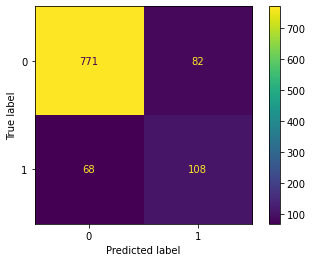

In [188]:
plot_confusion_matrix(lr_model, X_train_final, y_train)

### For Test Set

In [189]:
Confusion_Matrix(y_test, y_pred_test_lr)

[[334  46]
 [ 28  33]]
correctly specified percentage :  83.21995464852607
Incorrectly specified percentage :  16.780045351473923
Positive Prediction rate(Precision) :  0.4177215189873418
Negative Prediction Rate :  0.9226519337016574
Sensitivity(Recall) : 0.5409836065573771
Specificity : 0.8789473684210526


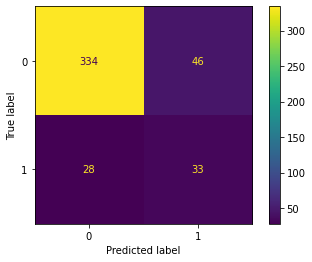

In [190]:
plot_confusion_matrix(lr_model, X_test_final, y_test)

### For test set the Accuracy score is quite closer to that of the Train set. But, Precision i.e, positive prediction rate is low than that of the Train set. Recall or Sensitivity is 54.09% i.e, it can identify 54.09% people out of all people who truly want to leave the organization. Specificity is 87.89% i.e, True Negative Prediction rate is 87.89% for test set or unknown data

In [191]:
classification_metrics(y_test, y_pred_test_lr)

Precision score is:  0.4177215189873418
Recall score is:  0.5409836065573771
F1 score is:  0.8409514030230242


### For test set The F1 score is 84.09% . The test dataset has class imbalance. As we know that for a data having class imbalance F1 score is a good metric so here for test set F1 score is good and quite closer to that of the train set(88.09%)

In [192]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

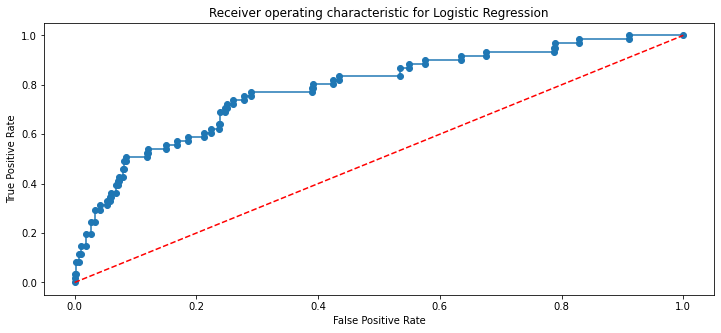

In [193]:
logit_roc_auc = roc_auc_score(y_test, lr_model.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test_final)[:,1])

plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, marker ='o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Logistic Regression')
plt.show()

In [194]:
print("The AUC-ROC score is :", logit_roc_auc)

The AUC-ROC score is : 0.7099654874892148


### 2. Decision Tree Model

In [195]:
from sklearn.tree import DecisionTreeClassifier

In [196]:
DT = DecisionTreeClassifier()   ##Full Grown Tree

In [197]:
#### Training the Model
DT_model = DT.fit(X_train_sm, y_train_sm)

In [198]:
DT_model

DecisionTreeClassifier()

###  Predicting the train set

In [199]:
y_pred_train_tree = DT_model.predict(X_train_sm)

In [200]:
y_pred_train_tree[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [201]:
y_train[:10]

714     0
135     0
1271    1
477     0
806     0
435     1
1303    0
630     0
598     1
1198    0
Name: Attrition, dtype: int64

In [202]:
accuracy_score(y_train_sm, y_pred_train_tree)

1.0

### Predicting the test set

In [203]:
y_pred_test_tree = DT_model.predict(X_test_final)

In [204]:
y_pred_test_tree[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [205]:
y_test[:10]

1041    0
184     0
1222    1
67      0
220     0
494     0
430     0
240     0
218     0
49      0
Name: Attrition, dtype: int64

In [206]:
accuracy_score(y_test, y_pred_test_tree)

0.7573696145124716

In [207]:
Confusion_Matrix(y_test, y_pred_test_tree)

[[316  64]
 [ 43  18]]
correctly specified percentage :  75.73696145124717
Incorrectly specified percentage :  24.263038548752835
Positive Prediction rate(Precision) :  0.21951219512195122
Negative Prediction Rate :  0.8802228412256268
Sensitivity(Recall) : 0.29508196721311475
Specificity : 0.8315789473684211


In [208]:
classification_metrics(y_test, y_pred_test_tree)

Precision score is:  0.21951219512195122
Recall score is:  0.29508196721311475
F1 score is:  0.7717377452540801


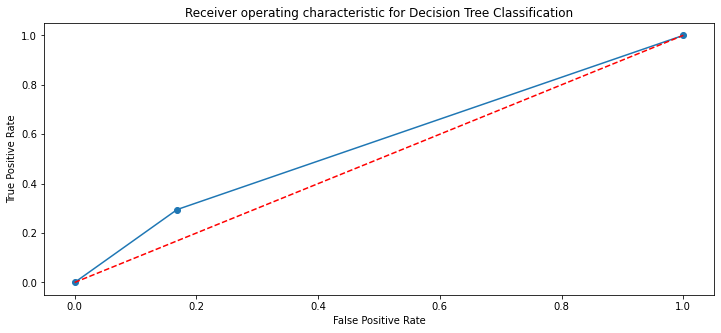

In [209]:
DT_model_roc_auc = roc_auc_score(y_test, DT_model.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, DT_model.predict_proba(X_test_final)[:,1])

plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, marker ='o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Decision Tree Classification')
plt.show()

In [210]:
print("The AUC-ROC score is :", DT_model_roc_auc)

The AUC-ROC score is : 0.5633304572907679


### We can see that the accuracy for test set using a full grown Decision Tree came as 75.51% . The Precision (positive prediction rate) is 20.98% and Recall or Sensitivity(True Positive prediction rate) is 27.86% which indicates that out of all people, who truly want to leave the organization, 27.86% people  can be identified by the model. F1 score is quite descent(76.90%) for test set where class imbalance exists.

### The Decision Tree model has been overfitted as we have used a full grown tree. So as a part of Hyperparameter tuning we will try to mention its Max_depth paratemer externally

In [211]:
DT_train_accuracy = []
DT_test_accuracy = []

for depth in range(1,25):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train_sm, y_train_sm)
    DT_train_accuracy.append(dt_model.score(X_train_sm, y_train_sm))
    DT_test_accuracy.append(dt_model.score(X_test_final, y_test))

In [212]:
DT_frame = pd.DataFrame({'max_depth': range(1,25), 'train_accuracy': DT_train_accuracy, 'test_accuracy': DT_test_accuracy})

In [213]:
DT_frame

,max_depth,train_accuracy,test_accuracy
0,1,0.712778,0.569161
1,2,0.723329,0.782313
2,3,0.786635,0.693878
3,4,0.815358,0.757370
4,5,0.870457,0.804989
5,6,0.901524,0.798186
6,7,0.932591,0.786848
7,8,0.963072,0.773243
8,9,0.977140,0.777778
9,10,0.986518,0.773243


### From the dataframe we can see that at max depth 5 the train accuracy is 87% and test accuracy is 80.49% i.e, the difference between the accuracy scores is minimum among all other max_depth values.So we will try the Decision Tree model again with the max_depth value fixing at 5

In [214]:
from pprint import pprint

In [215]:
Dec_Tree = DecisionTreeClassifier(max_depth=5)

In [216]:
print('Parameters currently in use:\n')
pprint(Dec_Tree.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [217]:
Dec_Tree = DecisionTreeClassifier(max_depth = 5, criterion='entropy',
                                  min_samples_split = 4, min_samples_leaf = 2,
                                 max_features = 'auto', random_state = 42)

In [218]:
Dec_Tree.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

### Predicting Train set

In [219]:
y_pred_train_Dec_Tree = Dec_Tree.predict(X_train_sm)

In [220]:
y_pred_train_Dec_Tree[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [221]:
y_train_sm[:10]

0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    0
8    1
9    0
Name: Attrition, dtype: int64

In [222]:
accuracy_score(y_train_sm, y_pred_train_Dec_Tree)

0.8065650644783119

In [223]:
Confusion_Matrix(y_train_sm, y_pred_train_Dec_Tree)

[[729 124]
 [206 647]]
correctly specified percentage :  80.65650644783119
Incorrectly specified percentage :  19.343493552168816
Positive Prediction rate(Precision) :  0.8391699092088197
Negative Prediction Rate :  0.7796791443850267
Sensitivity(Recall) : 0.7584994138335287
Specificity : 0.854630715123095


In [224]:
classification_metrics(y_train_sm, y_pred_train_Dec_Tree)

Precision score is:  0.8391699092088197
Recall score is:  0.7584994138335287
F1 score is:  0.8061171355836944


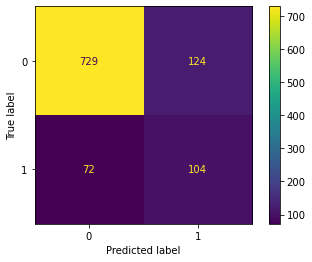

In [225]:
plot_confusion_matrix(Dec_Tree, X_train_final, y_train)

### As we can see here , for train set, Decision Tree shows the Accuracy as 80.65% after giving max_depth = 5 and mentioning some other hyperparameters which is lesser than that of Logistic Regression. The sensitivity or Recall i.e, True Positive Prediction Rate is 75.84% which indicates that out of all people who are truly tending to leave the organization, approximately 76% people can be identified by the model. Precision i.e, Positive prediction rate is 83.91% which is slightly higher than that of Logistic Regression. F1 Score is also pretty descent(80.61%). 

### Predicting Test set

In [226]:
y_pred_test_Dec_Tree = Dec_Tree.predict(X_test_final)

In [227]:
y_pred_test_Dec_Tree[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [228]:
y_test[:10]

1041    0
184     0
1222    1
67      0
220     0
494     0
430     0
240     0
218     0
49      0
Name: Attrition, dtype: int64

In [229]:
accuracy_score(y_pred_test_Dec_Tree, y_test)

0.7664399092970522

In [230]:
Confusion_Matrix(y_test, y_pred_test_Dec_Tree)

[[313  67]
 [ 36  25]]
correctly specified percentage :  76.64399092970523
Incorrectly specified percentage :  23.356009070294785
Positive Prediction rate(Precision) :  0.2717391304347826
Negative Prediction Rate :  0.8968481375358166
Sensitivity(Recall) : 0.4098360655737705
Specificity : 0.8236842105263158


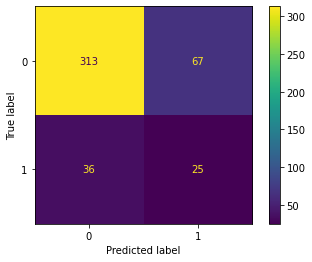

In [231]:
plot_confusion_matrix(Dec_Tree, X_test_final, y_test)

### Applying same model for test set, we get Accuracy as 76.64% . Precision i.e, positive prediction rate as 27.17% . True Positive Prediction Rate(Recall) is 40.98% or 41% i.e, out of all truly eager people for leaving the organization the model can identify 40 people which is quite lesser than that of the Logistic Regression model. Specificty is 82.36% i.e, Out of all actual negative model could predict only 82.36% which is higher than that of Logistic Regression for test set.

In [232]:
classification_metrics(y_test, y_pred_test_Dec_Tree)

Precision score is:  0.2717391304347826
Recall score is:  0.4098360655737705
F1 score is:  0.7851352703861608


### F1 score is 78.51% for test set i.e, unknown data. which is pretty descent value but it is a little lesser than that of the Logistic Regression for Test Set(84% approx.)

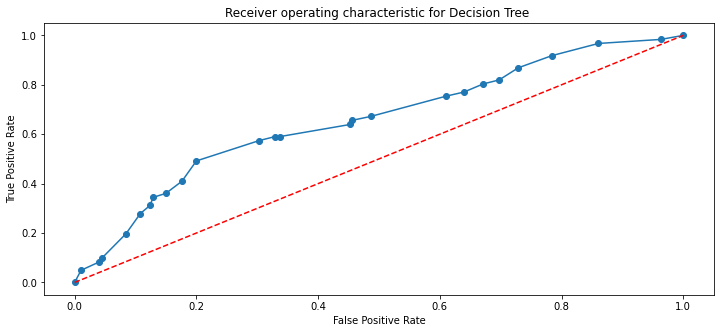

In [233]:
Dec_Tree_roc_auc = roc_auc_score(y_test, Dec_Tree.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, Dec_Tree.predict_proba(X_test_final)[:,1])

plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, marker ='o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Decision Tree ')
plt.show()

In [234]:
print("The AUC-ROC score for Decision Tree is: ", Dec_Tree_roc_auc)

The AUC-ROC score for Decision Tree is:  0.6167601380500431


### From the above two models Logistic Regression shows slight better performance than Decition Tree